In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from wordcloud import WordCloud
from uszipcode import SearchEngine

/home/sm/miniconda3/envs/tf-env/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
DATA_DIR = "../data/ml-100k/"
print(os.listdir(DATA_DIR))

['allbut.pl', 'mku.sh', 'README', 'u.data', 'u.genre', 'u.info', 'u.item', 'u.occupation', 'u.user', 'u1.base', 'u1.test', 'u2.base', 'u2.test', 'u3.base', 'u3.test', 'u4.base', 'u4.test', 'u5.base', 'u5.test', 'ua.base', 'ua.test', 'ub.base', 'ub.test']


In [7]:
dateparse = lambda x: datetime.utcfromtimestamp(int(x)).strftime("%Y-%m-%d %H:%M:%S")

ratings = pd.read_csv(
    DATA_DIR + "u.data",
    sep="\t",
    names=["user_id", "movie_id", "rating", "timestamp"],
    parse_dates=["timestamp"],
    date_parser=dateparse,
)

/tmp/ipykernel_860504/706409668.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ratings = pd.read_csv(DATA_DIR + "u.data", sep="\t",


In [8]:
ratings.head(10)

,user_id,movie_id,rating,timestamp
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16
5,298,474,4,1998-01-07 14:20:06
6,115,265,2,1997-12-03 17:51:28
7,253,465,5,1998-04-03 18:34:27
8,305,451,3,1998-02-01 09:20:17
9,6,86,3,1997-12-31 21:16:53


In [10]:
movies = pd.read_csv(
    DATA_DIR + "u.item",
    sep="|",
    encoding="latin-1",
    names=[
        "movie_id",
        "movie_title",
        "release_date",
        "video_release_date",
        "imdb_url",
        "unknown",
        "action",
        "adventure",
        "animation",
        "childrens",
        "comedy",
        "crime",
        "documentary",
        "drama",
        "fantasy",
        "film_noir",
        "horror",
        "musical",
        "mystery",
        "romance",
        "sci_fi",
        "thriller",
        "war",
        "western",
    ],
)

movies.head(10)

,movie_id,movie_title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,childrens,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
users = pd.read_csv(
    DATA_DIR + "u.user",
    sep="|",
    encoding="latin-1",
    names=["user_id", "age", "gender", "occupation", "zip_code"],
)

In [12]:
users.head(10)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [13]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   movie_title         1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   imdb_url            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   action              1682 non-null   int64  
 7   adventure           1682 non-null   int64  
 8   animation           1682 non-null   int64  
 9   childrens           1682 non-null   int64  
 10  comedy              1682 non-null   int64  
 11  crime               1682 non-null   int64  
 12  documentary         1682 non-null   int64  
 13  drama               1682 non-null   int64  
 14  fantasy             1682 non-null   int64  
 15  film_noir           1682 non-null   int64  
 16  horror

In [17]:
movies.describe().style.background_gradient()

,movie_id,video_release_date,unknown,action,adventure,animation,childrens,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
count,1682.000000,0.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,841.500000,nan,0.001189,0.149227,0.080262,0.024970,0.072533,0.300238,0.064804,0.029727,0.431034,0.013080,0.014269,0.054697,0.033294,0.036266,0.146849,0.060048,0.149227,0.042212,0.016052
std,485.695893,nan,0.034473,0.356418,0.271779,0.156081,0.259445,0.458498,0.246253,0.169882,0.495368,0.113650,0.118632,0.227455,0.179456,0.187008,0.354061,0.237646,0.356418,0.201131,0.125714
min,1.000000,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,421.250000,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,841.500000,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1261.750000,nan,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,nan,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
print(movies.shape)
movies.isnull().sum()

(1682, 24)


movie_id                 0
movie_title              0
release_date             1
video_release_date    1682
imdb_url                 3
unknown                  0
action                   0
adventure                0
animation                0
childrens                0
comedy                   0
crime                    0
documentary              0
drama                    0
fantasy                  0
film_noir                0
horror                   0
musical                  0
mystery                  0
romance                  0
sci_fi                   0
thriller                 0
war                      0
western                  0
dtype: int64

1. video release date contains lots of NaN
2. release date need to be parsed to datetime

In [20]:
movies["release_date"] = pd.to_datetime(movies["release_date"])

In [21]:
# Check Nan
def check_nan_percent(df: pd.DataFrame):
    columns_null_count = df.isnull().sum()
    null_percent_df = pd.DataFrame(
        {
            "null_percent": (columns_null_count / df.shape[0]) * 100,
            "total_null": columns_null_count,
        }
    )

    return null_percent_df[null_percent_df["null_percent"] > 0]

In [22]:
check_nan_percent(movies)

,null_percent,total_null
release_date,0.059453,1
video_release_date,100.000000,1682
imdb_url,0.178359,3


In [25]:
movies.drop(columns=["video_release_date", "imdb_url"], inplace=True)
movies["release_date"].fillna(value=movies["release_date"].mode()[0], inplace=True)

check_nan_percent(movies)

/tmp/ipykernel_860504/2454432509.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies["release_date"].fillna(value=movies["release_date"].mode()[0], inplace=True)


,null_percent,total_null


In [26]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   user_id    100000 non-null  int64         
 1   movie_id   100000 non-null  int64         
 2   rating     100000 non-null  int64         
 3   timestamp  100000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 3.1 MB


In [28]:
ratings.describe().style.background_gradient(cmap="Blues")

,user_id,movie_id,rating,timestamp
count,100000.000000,100000.000000,100000.000000,100000
mean,462.484750,425.530130,3.529860,1997-12-31 00:40:51.488619904
min,1.000000,1.000000,1.000000,1997-09-20 03:05:10
25%,254.000000,175.000000,3.000000,1997-11-13 19:18:29.500000
50%,447.000000,322.000000,4.000000,1997-12-22 21:42:24
75%,682.000000,631.000000,4.000000,1998-02-23 18:53:04
max,943.000000,1682.000000,5.000000,1998-04-22 23:10:38
std,266.614420,330.798356,1.125674,nan


In [23]:
check_nan_percent(ratings)

,null_percent,total_null


In [30]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [31]:
users.describe().style.background_gradient()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [24]:
check_nan_percent(users)

,null_percent,total_null


In [65]:
# Get city name from zip code
search = SearchEngine()
city = []
for z in users["zip_code"]:
    zipcode = search.by_zipcode(z)
    if zipcode:
        city.append(zipcode.major_city)
    else:
        city.append(np.nan)

In [66]:
users["city"] = city

In [67]:
users.sample(5)

,user_id,age,gender,occupation,zip_code,city
797,798,40,F,writer,64131,Kansas City
213,214,26,F,librarian,11231,Brooklyn
307,308,60,M,retired,95076,Watsonville
296,297,29,F,educator,98103,Seattle
777,778,34,M,student,01960,Peabody


In [68]:
users.describe().style.background_gradient(cmap="Reds")

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [69]:
check_nan_percent(users)

,null_percent,total_null
city,3.711559,35


In [70]:
users[users.city.isnull()]

,user_id,age,gender,occupation,zip_code,city
53,54,22,M,executive,66315,NaN
72,73,24,M,student,41850,NaN
73,74,39,M,scientist,T8H1N,NaN
85,86,26,M,administrator,46005,NaN
144,145,31,M,entertainment,V3N4P,NaN
166,167,37,M,other,L9G2B,NaN
185,186,39,F,executive,00000,NaN
193,194,38,M,administrator,02154,NaN
200,201,27,M,writer,E2A4H,NaN
332,333,47,M,other,V0R2M,NaN


In [71]:
users.city.fillna(value="unknown", inplace=True)

/tmp/ipykernel_860504/3785438339.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  users.city.fillna(value="unknown", inplace=True)


In [168]:
rating_users = ratings.join(other=users, how="inner", on="user_id", lsuffix="_R")
rating_user_movies = rating_users.join(
    other=movies, how="inner", on="movie_id", rsuffix="_M"
)
rating_moveis = ratings.join(other=movies, how="inner", on="movie_id", rsuffix="_M")

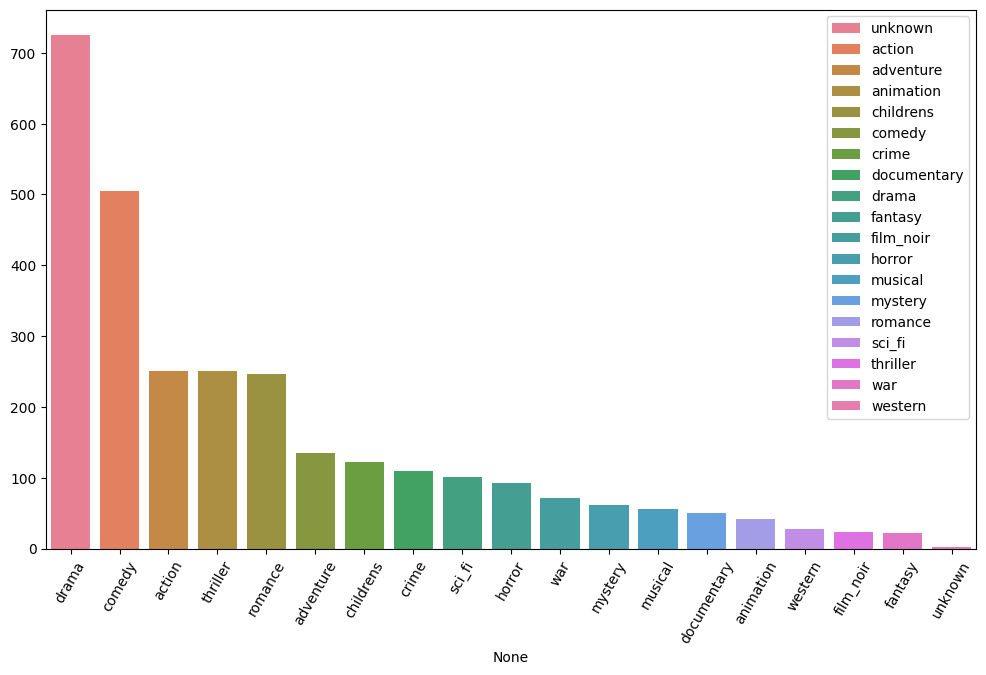

In [80]:
# Common generes?

generes = [
    "unknown",
    "action",
    "adventure",
    "animation",
    "childrens",
    "comedy",
    "crime",
    "documentary",
    "drama",
    "fantasy",
    "film_noir",
    "horror",
    "musical",
    "mystery",
    "romance",
    "sci_fi",
    "thriller",
    "war",
    "western",
]

plt.figure(figsize=(12, 7))
genere_counts = movies.loc[:, generes].sum().sort_values(ascending=False)
sns.barplot(x=genere_counts.index, y=genere_counts.values, hue=generes)
plt.xticks(rotation=60)

Text(0.5, 0, 'Realease Year')

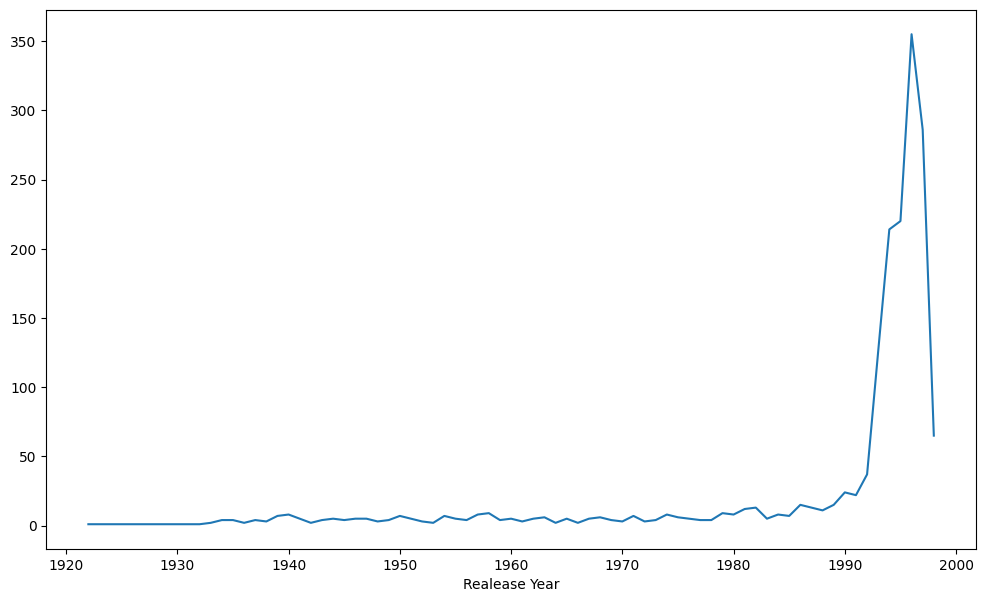

In [82]:
# Most release year ?
plt.figure(figsize=(12, 7))
yearly_release_counts = (
    movies.groupby(movies["release_date"].dt.year).size().sort_values(ascending=False)
)
sns.lineplot(yearly_release_counts)
plt.xlabel("Realease Year")

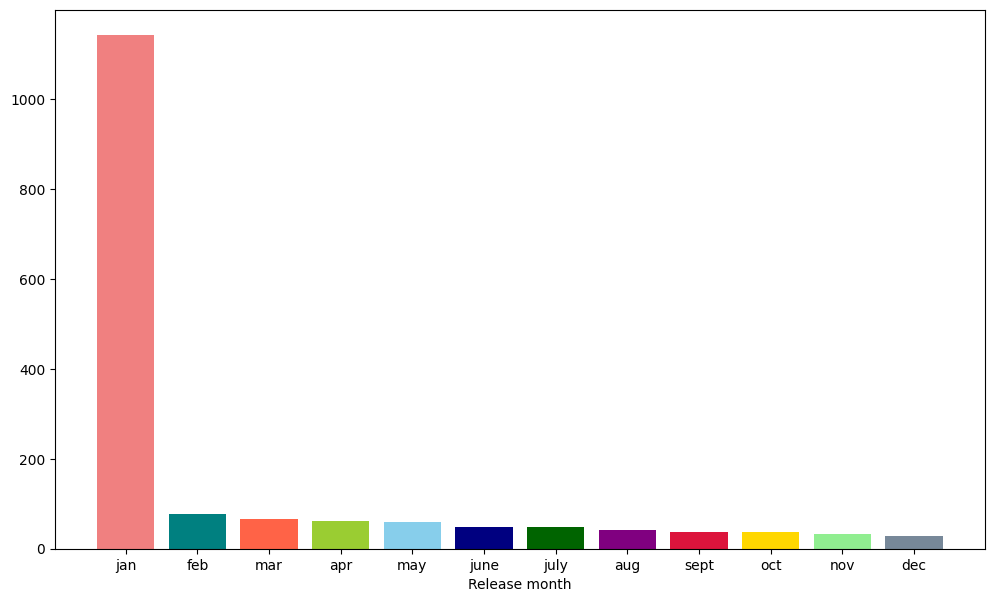

In [113]:
# Most release month ?
plt.figure(figsize=(12, 7))
monthly_release_counts = (
    movies.groupby(movies["release_date"].dt.month).size().sort_values(ascending=False)
)
months = [
    "jan",
    "feb",
    "mar",
    "apr",
    "may",
    "june",
    "july",
    "aug",
    "sept",
    "oct",
    "nov",
    "dec",
]
color_list = [
    "lightcoral",
    "teal",
    "tomato",
    "yellowgreen",
    "skyblue",
    "navy",
    "darkgreen",
    "purple",
    "crimson",
    "gold",
    "lightgreen",
    "lightslategray",
]
plt.bar(months, monthly_release_counts, color=color_list)
plt.xlabel("Release month")

<BarContainer object of 7 artists>

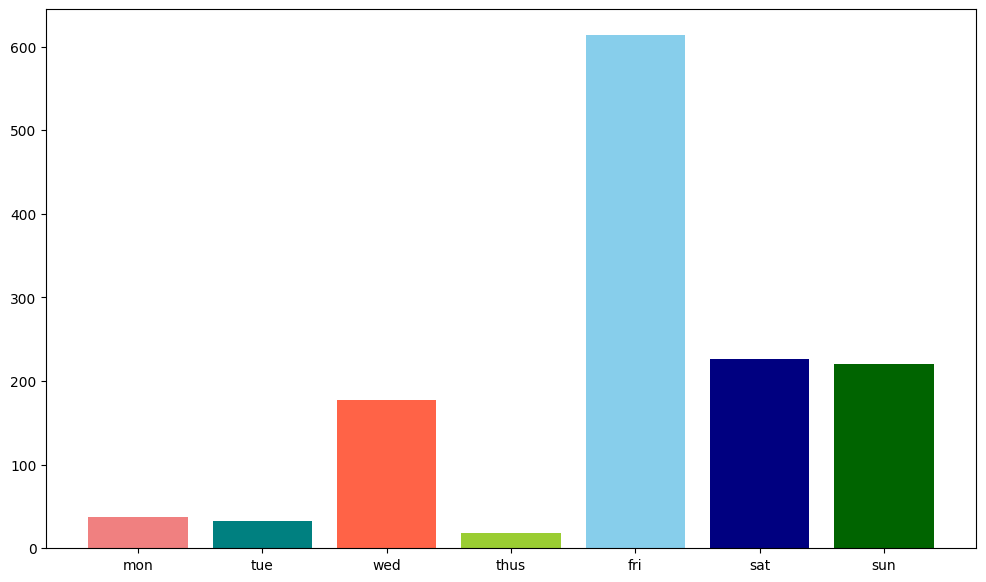

In [115]:
# most prefferable week?

plt.figure(figsize=(12, 7))
weekday_release_counts = (
    movies[movies["release_date"].dt.year > 1990]
    .groupby(movies["release_date"].dt.dayofweek)
    .size()
)
weekdays = ["mon", "tue", "wed", "thus", "fri", "sat", "sun"]
plt.bar(weekdays, weekday_release_counts.values, color=color_list[:7])

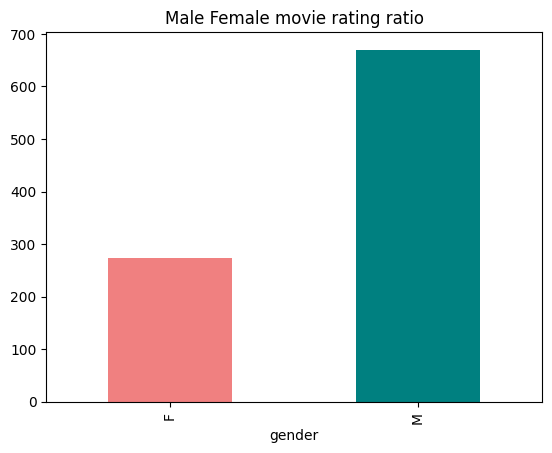

In [128]:
users.groupby("gender").size().plot.bar(color=color_list[:2])
plt.title("Male Female movie rating ratio")

In [133]:
users["age_group"] = users.age.apply(
    lambda age: (
        "Gradeschooler"
        if 5 <= age <= 12
        else (
            "Teenager"
            if 13 <= age <= 19
            else (
                "Young"
                if 20 <= age <= 35
                else ("Midlife" if 35 <= age <= 55 else "Old")
            )
        )
    )
)
users.sample(3)

,user_id,age,gender,occupation,zip_code,city,age_group
551,552,45,M,other,68147,Bellevue,Midlife
613,614,54,M,educator,80227,Denver,Midlife
235,236,44,F,writer,53214,Milwaukee,Midlife


<Axes: xlabel='age_group'>

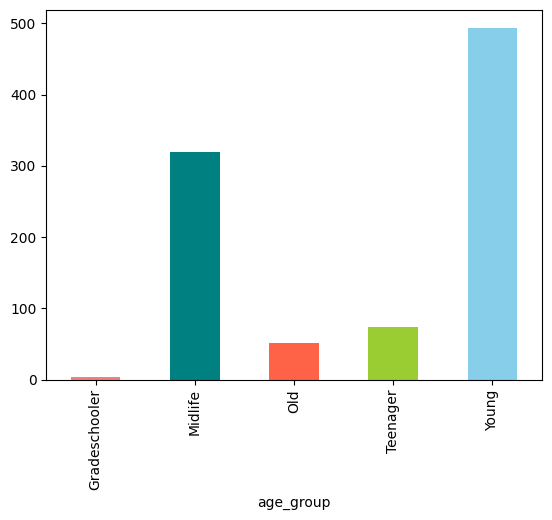

In [134]:
# Age Group?
# Midflie 35 <= age <= 55
# Young 20 <= age <= 35
# are much more watching and rating to movies

users.groupby("age_group").size().plot.bar(color=color_list[:5])

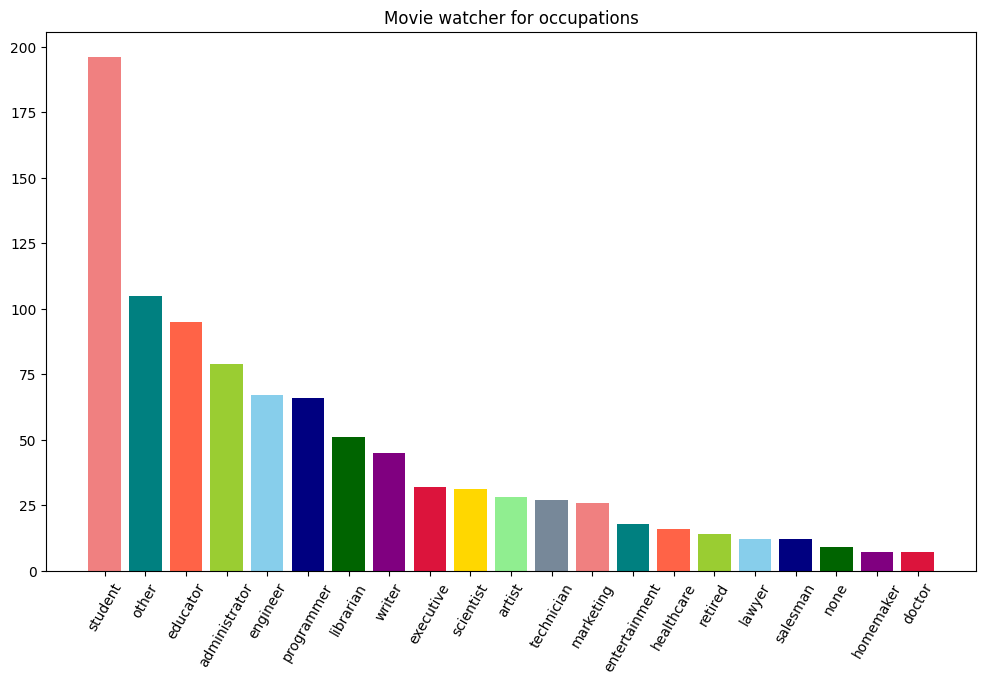

In [148]:
# Occupant?
plt.figure(figsize=(12, 7))
movie_watcher_occupants = (
    users.groupby("occupation").size().sort_values(ascending=False)
)
occu_categories = users["occupation"].unique()
plt.bar(
    movie_watcher_occupants.index,
    movie_watcher_occupants,
    color=color_list[: len(occu_categories)],
)
plt.title("Movie watcher for occupations")
plt.xticks(rotation=60)

In [153]:
pd.options.display.max_rows = 100
pd.DataFrame(
    users.groupby(["occupation", "age_group"]).size().sort_values(ascending=False)
)

0
occupation    age_group         
student       Young          128
              Teenager        62
other         Young           59
educator      Midlife         51
programmer    Young           45
other         Midlife         39
administrator Midlife         38
              Young           36
engineer      Young           33
educator      Young           33
engineer      Midlife         28
librarian     Midlife         25
              Young           22
writer        Midlife         21
              Young           20
technician    Young           19
programmer    Midlife         19
executive     Midlife         18
artist        Young           18
scientist     Midlife         17
marketing     Midlife         14
scientist     Young           14
retired       Old             13
marketing     Young           12
entertainment Young           12
executive     Young           12
educator      Old             11
healthcare    Midlife         10
artist        Midlife          9
technician    Midlife          8
salesman      Young            7
lawyer        Young            7
engineer      Old              6
administrator Old              5
lawyer        Midlife          5
none          Young            5
homemaker     Young            5
healthcare    Young            5
student       Midlife          4
doctor        Midlife          4
entertainment Midlife          4
other         Teenager         4
librarian     Old              4
other         Old              3
homemaker     Midlife          2
writer        Teenager         2
entertainment Teenager         2
salesman      Midlife          2
              Old              2
writer        Old              2
doctor        Young            2
none          Teenager         2
programmer    Old              2
student       Gradeschooler    2
executive     Old              2
healthcare    Old              1
doctor        Old              1
artist        Teenager         1
none          Gradeschooler    1
salesman      Teenager         1
retired       Midlife          1
none          Midlife          1

In [181]:
gender_generes = rating_user_movies.loc[:, generes + ["gender"]].groupby("gender").sum()
gender_generes

,unknown,action,adventure,animation,childrens,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
gender,,,,,,,,,,,,,,,,,,,
F,12,6297,3451,1143,2433,9437,2342,526,11523,407,543,1914,1394,1341,4920,3084,5421,2149,797
M,26,14761,8256,2665,5809,22131,5429,1188,27333,1025,1373,4748,3371,3066,11275,7224,12574,5105,1899


<Axes: xlabel='gender'>

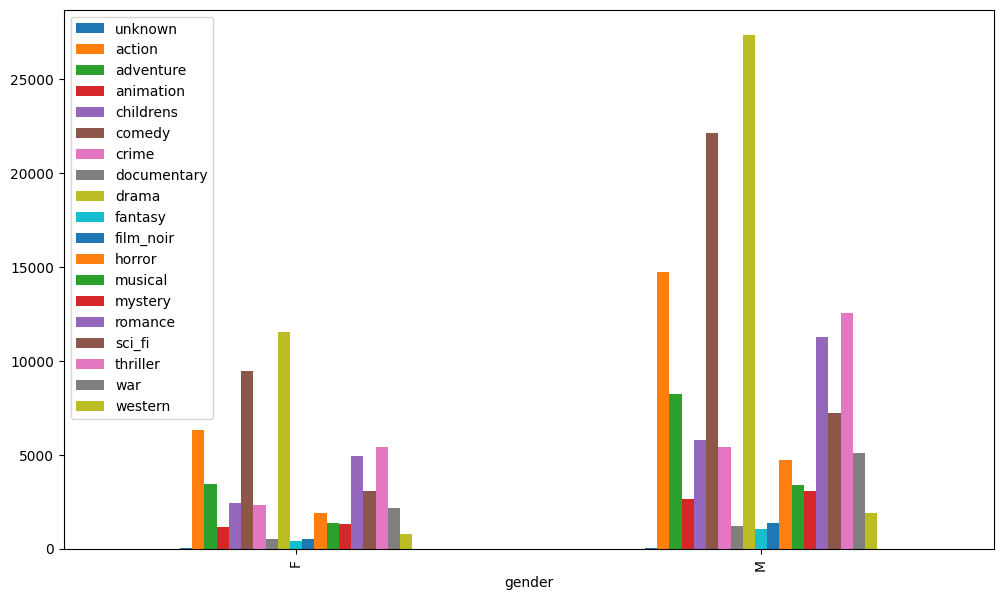

In [175]:
rating_user_movies.loc[:, generes + ["gender"]].groupby("gender").sum().plot.bar(
    figsize=(12, 7)
)

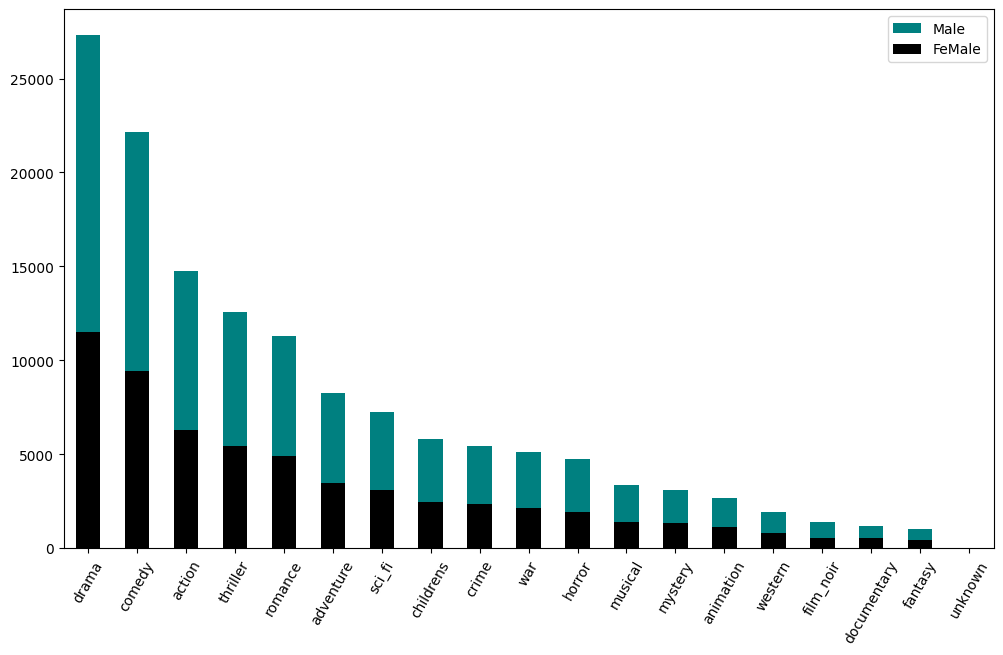

In [188]:
plt.figure(figsize=(12, 7))

gender_generes.loc["M", :].sort_values(ascending=False).plot(
    kind="bar", color="teal", label="Male"
)
gender_generes.loc["F", :].sort_values(ascending=False).plot(
    kind="bar", color="black", label="FeMale"
)
plt.legend()
plt.xticks(rotation=60)

In [195]:
# what age group watches movies?

age_genere = (
    rating_user_movies.loc[:, generes + ["age_group"]].groupby("age_group").sum()
)
age_genere

,unknown,action,adventure,animation,childrens,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
age_group,,,,,,,,,,,,,,,,,,,
Gradeschooler,0,37,18,6,12,47,9,3,72,2,1,9,5,9,34,20,33,17,4
Midlife,14,7625,4280,1389,3003,11535,2778,628,14193,537,720,2468,1783,1615,5924,3707,6492,2630,982
Old,3,1180,644,217,435,1675,406,86,2004,81,95,380,257,217,870,572,943,384,159
Teenager,4,1681,921,309,629,2513,619,133,3018,107,142,597,378,340,1265,793,1381,562,219
Young,17,10535,5844,1887,4163,15798,3959,864,19569,705,958,3208,2342,2226,8102,5216,9146,3661,1332


<Axes: xlabel='age_group'>

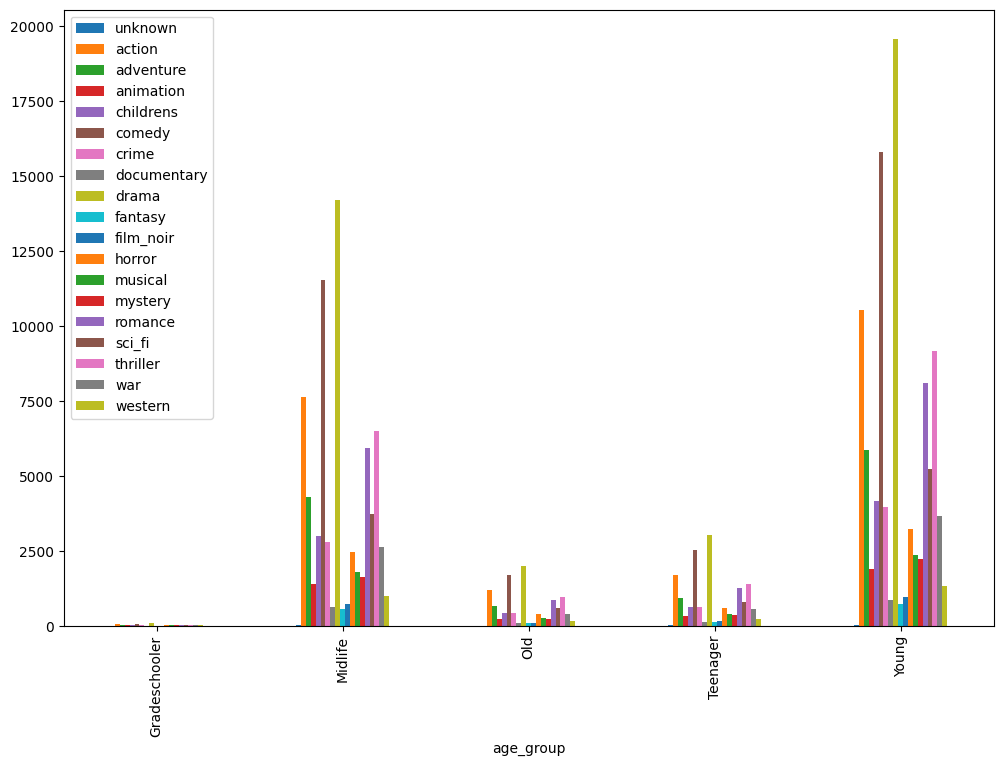

In [216]:
age_genere.plot.bar(figsize=(12, 8))

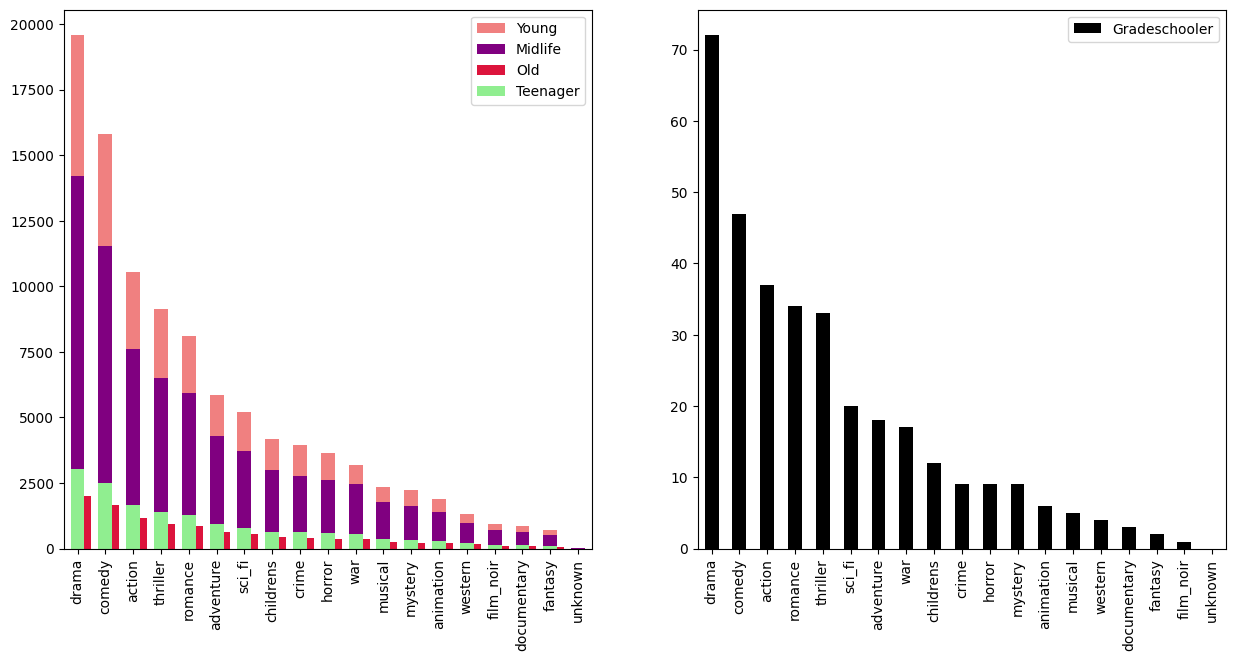

In [231]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
age_genere.loc["Young", :].sort_values(ascending=False).plot(
    kind="bar", color=color_list[0], label="Young", ax=ax[0]
)
age_genere.loc["Midlife", :].sort_values(ascending=False).plot(
    kind="bar", color=color_list[7], label="Midlife", ax=ax[0]
)
age_genere.loc["Gradeschooler", :].sort_values(ascending=False).plot(
    kind="bar", color="black", label="Gradeschooler", ax=ax[1]
)
age_genere.loc["Old", :].sort_values(ascending=False).plot(
    kind="bar", color=color_list[8], label="Old", align="edge", ax=ax[0]
)
age_genere.loc["Teenager", :].sort_values(ascending=False).plot(
    kind="bar", color=color_list[10], label="Teenager", ax=ax[0]
)
ax[0].legend()
ax[1].legend()

In [236]:
ratings.groupby(ratings["timestamp"].dt.year).size()

timestamp
1997    52899
1998    47101
dtype: int64

In [239]:
rating_users.groupby([ratings["timestamp"].dt.year, "gender"]).size()

timestamp  gender
1997       F         18311
           M         34550
1998       F         11474
           M         35497
dtype: int64

In [241]:
rating_users.groupby([ratings["timestamp"].dt.year, "age_group"]).size()

timestamp  age_group    
1997       Gradeschooler       91
           Midlife          18482
           Old               2439
           Teenager          4459
           Young            27390
1998       Gradeschooler       75
           Midlife          18020
           Old               2832
           Teenager          3453
           Young            22591
dtype: int64

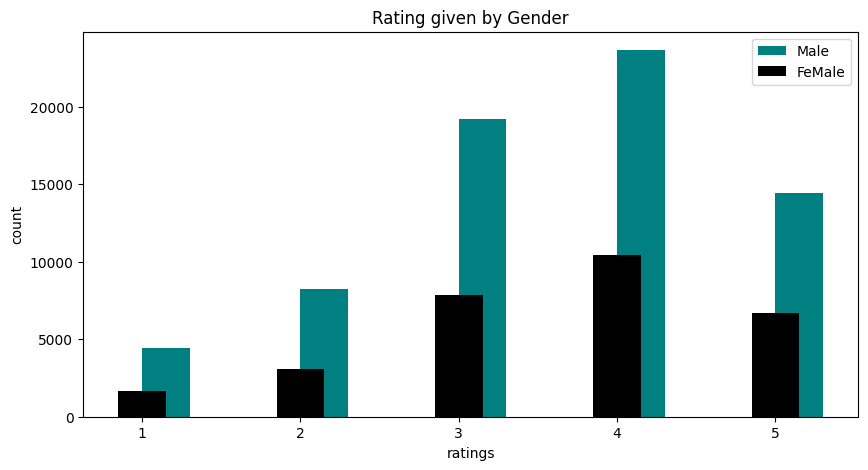

In [249]:
gender_ratings = rating_users.groupby(["gender", "rating"]).size()
plt.figure(figsize=(10, 5))
male_ratings = gender_ratings["M"].sort_values(ascending=False)
female_ratings = gender_ratings["F"].sort_values(ascending=False)
plt.bar(
    x=male_ratings.index,
    height=male_ratings.values,
    label="Male",
    align="edge",
    width=0.3,
    color="teal",
)
plt.bar(
    x=female_ratings.index,
    height=female_ratings.values,
    label="FeMale",
    width=0.3,
    color="black",
)
plt.legend()
plt.xlabel("ratings")
plt.ylabel("count")
plt.title("Rating given by Gender")

In [276]:
K = 10
top_K_rated_movies = (
    rating_moveis.groupby("movie_id").size().sort_values(ascending=False)[:K]
)
top_K_rated_movies

movie_id
50     583
258    509
100    508
181    507
294    485
286    481
288    478
1      452
300    431
121    429
dtype: int64

<BarContainer object of 10 artists>

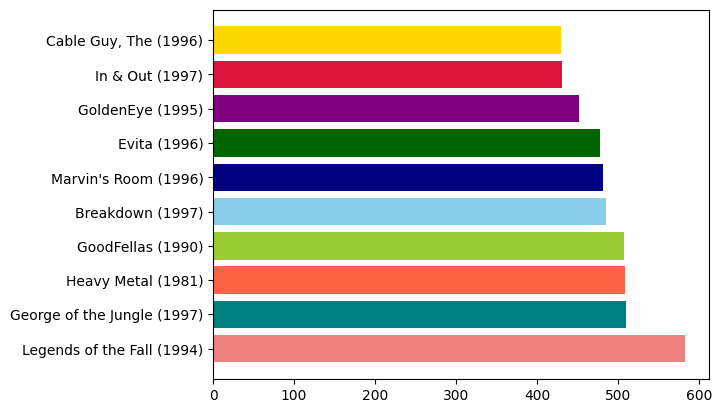

In [318]:
top_K_movies_titles = movies.iloc[top_K_rated_movies.index].movie_title

plt.barh(top_K_movies_titles.values, top_K_rated_movies, color=color_list[:K])

In [284]:
top_rated_movies_gender = rating_users.groupby(["gender", "movie_id"]).size()
top_rated_movies_gender

gender  movie_id
F       1           123
        2            40
        3            27
        4            68
        5            26
                   ... 
M       1677          1
        1678          1
        1679          1
        1680          1
        1681          1
Length: 3090, dtype: int64

F
M


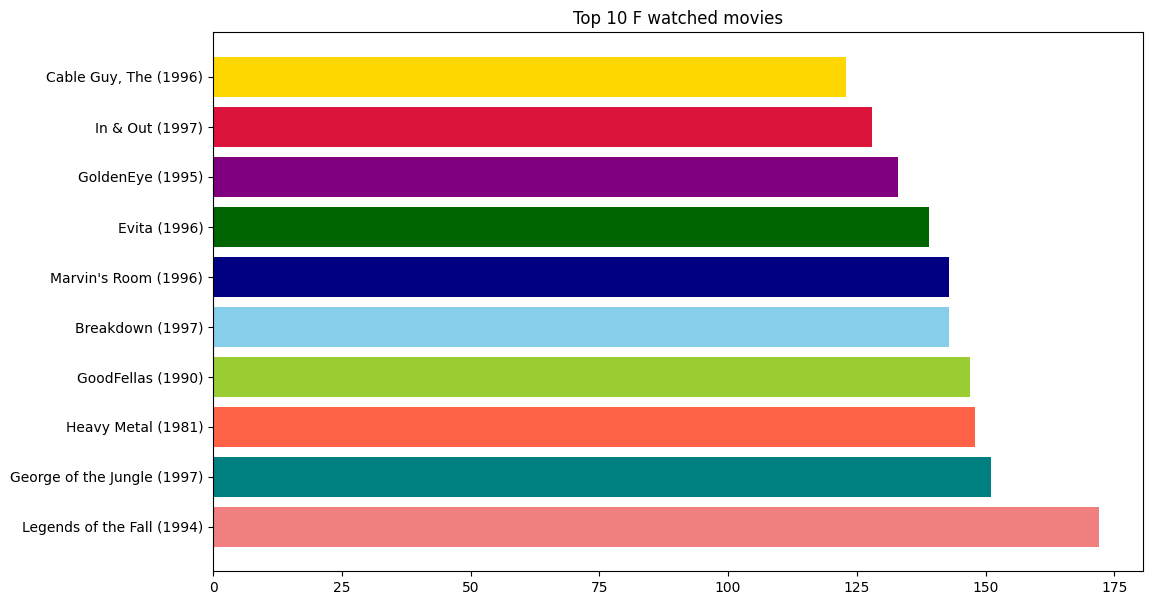

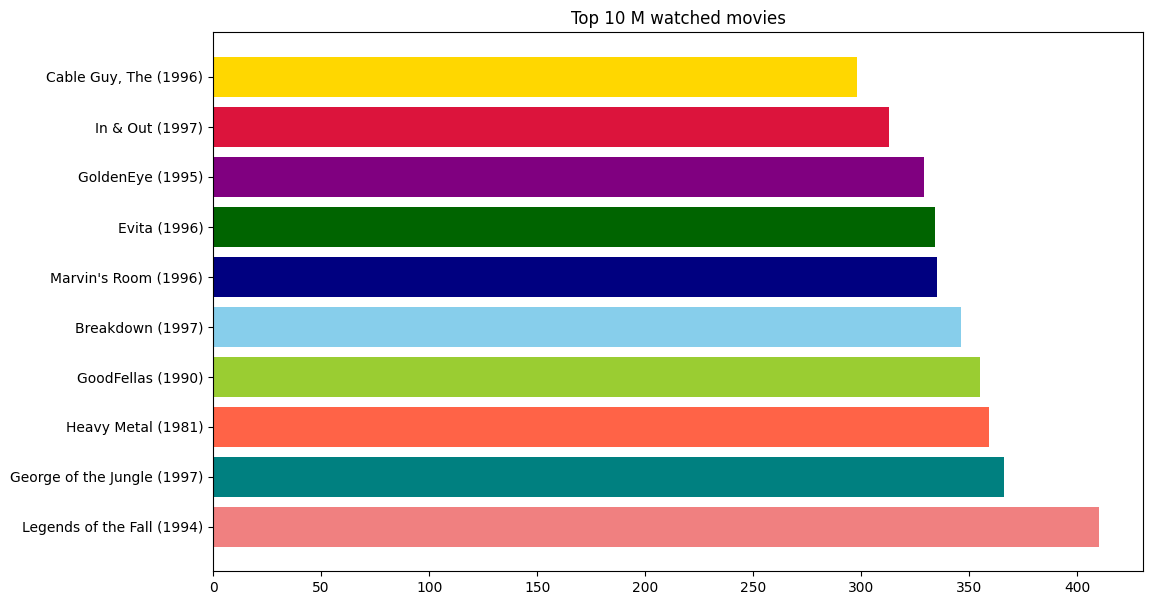

In [317]:
for index_gender in top_rated_movies_gender.index.get_level_values(0).unique():
    print(index_gender)
    top_K_userkind_rated_movies = top_rated_movies_gender[index_gender].sort_values(
        ascending=False
    )[:K]
    top_K_userkind_rated_movie_titles = movies.iloc[
        top_K_rated_movies.index
    ].movie_title
    plt.figure(figsize=(12, 7))
    plt.barh(
        top_K_userkind_rated_movie_titles,
        top_K_userkind_rated_movies,
        color=color_list[:K],
    )
    plt.title(f"Top {K} {index_gender} watched movies")

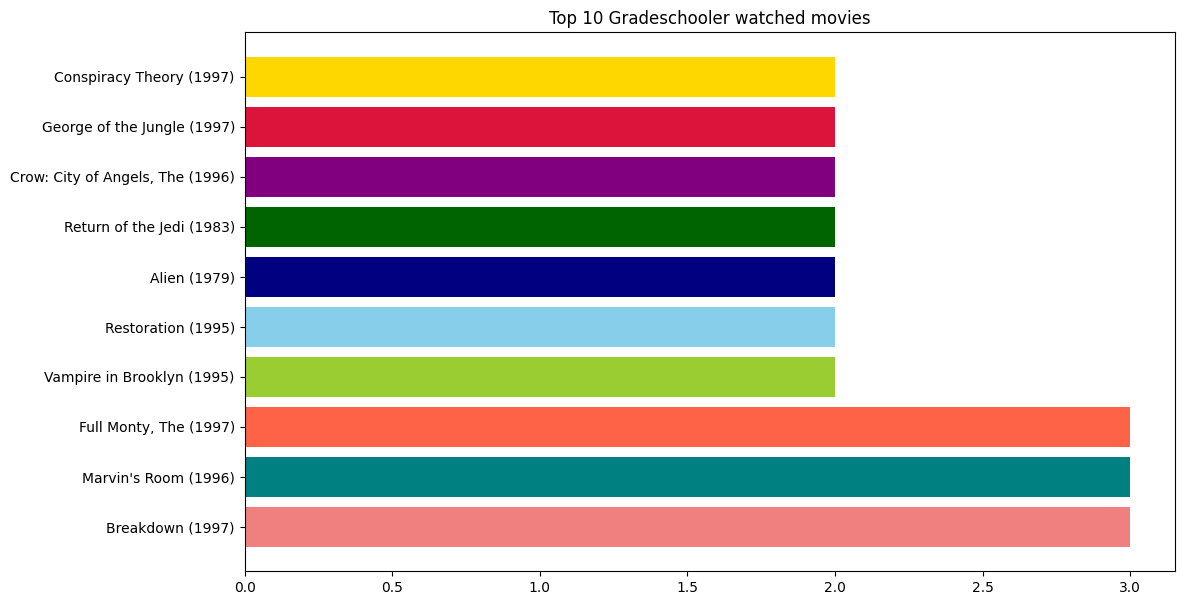

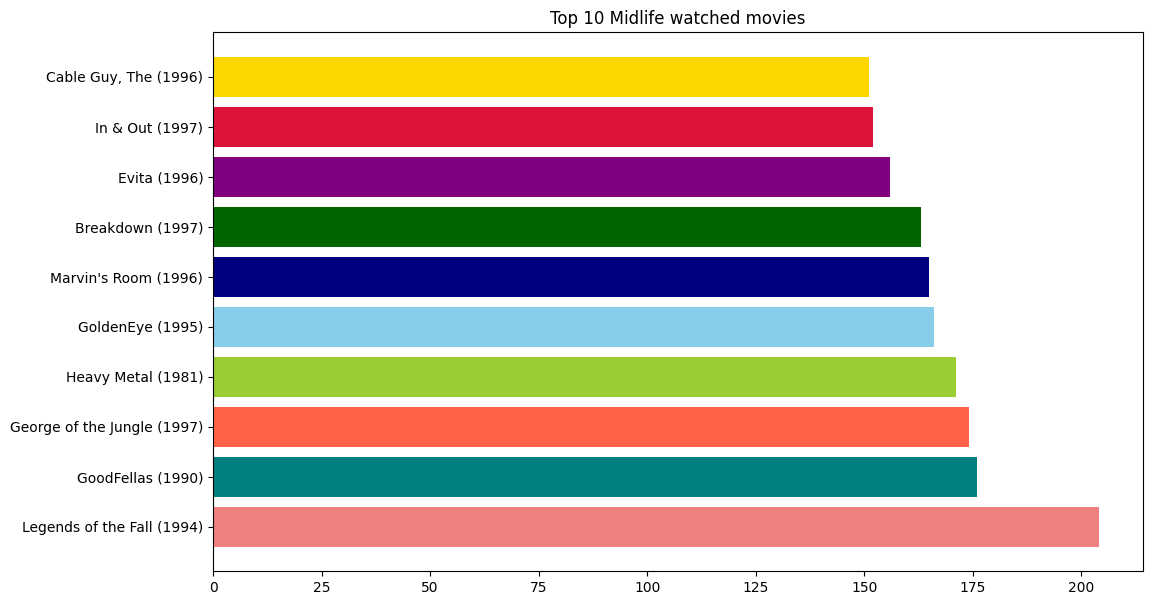

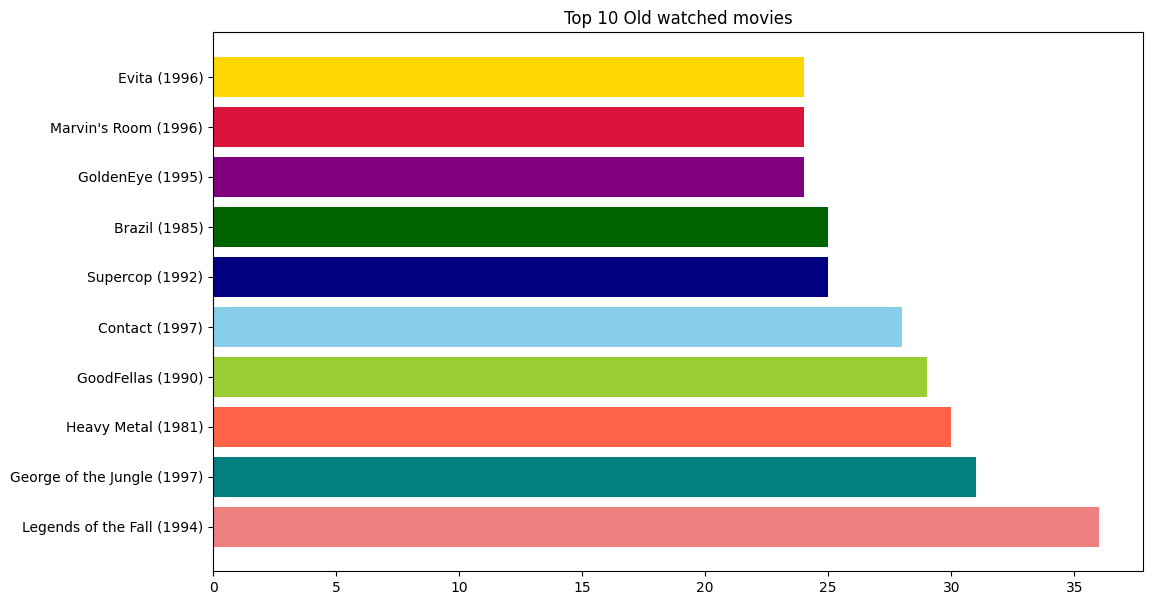

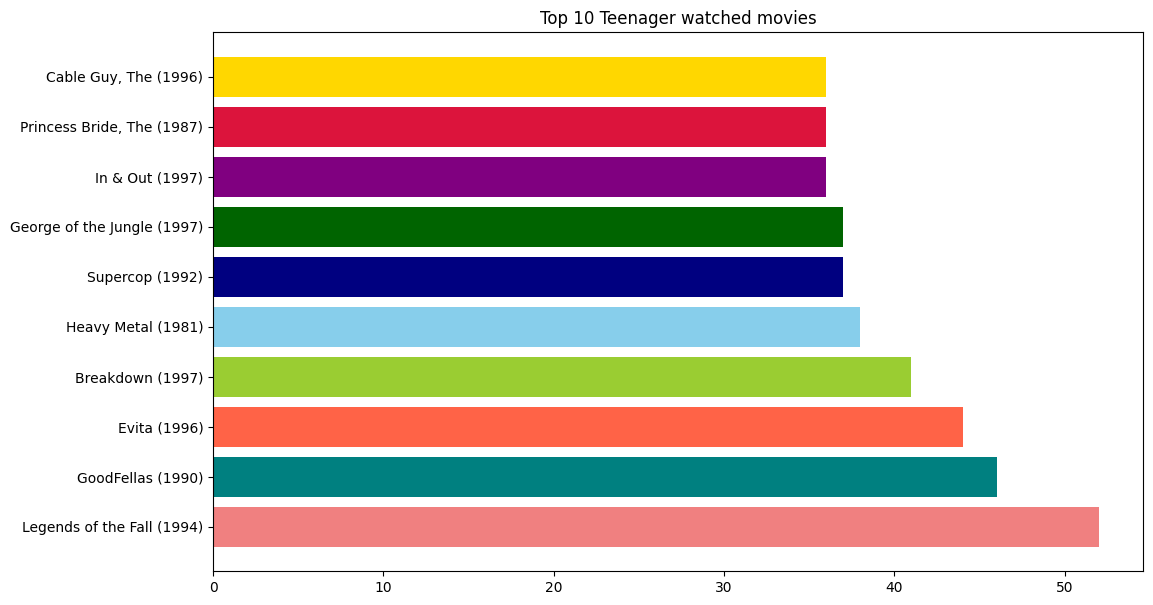

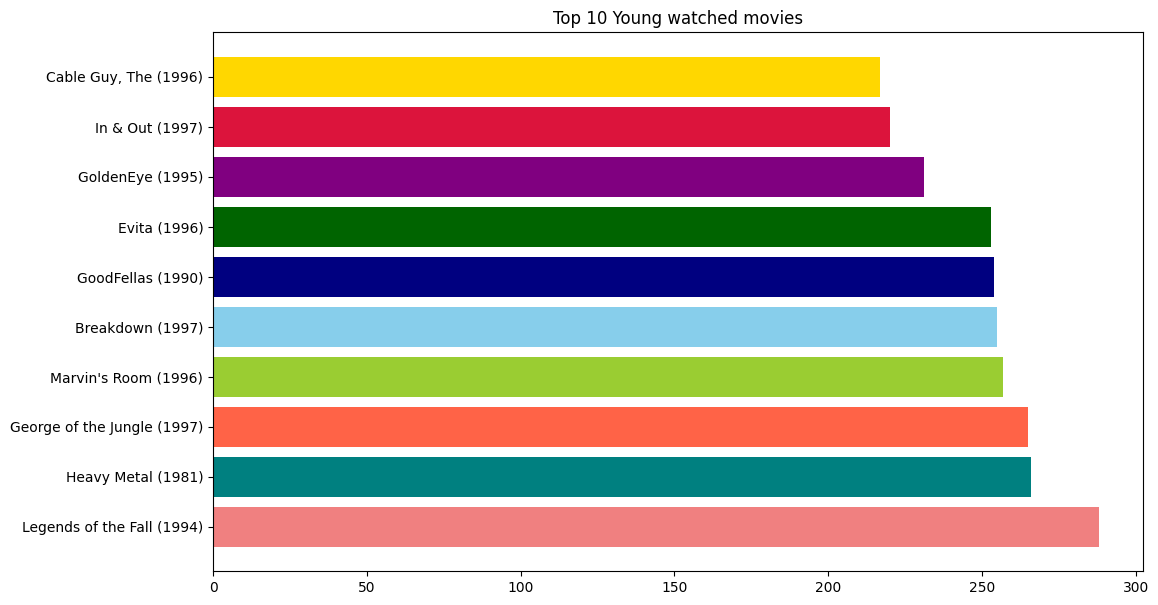

In [316]:
top_rated_movies_age_group = rating_user_movies.groupby(
    ["age_group", "movie_id"]
).size()

for index_age in top_rated_movies_age_group.index.get_level_values(0).unique():
    top_K_agegroup_rated_movies = top_rated_movies_age_group[index_age].sort_values(
        ascending=False
    )[:K]
    top_K_agegroup_rated_movies_title = movies.iloc[
        top_K_agegroup_rated_movies.index
    ].movie_title

    plt.figure(figsize=(12, 7))
    plt.barh(
        top_K_agegroup_rated_movies_title,
        top_K_agegroup_rated_movies,
        color=color_list[:K],
    )
    plt.title(f"Top {K} {index_age} watched movies")

In [307]:
rating_moveis

,user_id,movie_id,rating,timestamp,movie_id_M,movie_title,release_date,unknown,action,adventure,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
0,196,242,3,1997-12-04 15:55:49,243,Jungle2Jungle (1997),1997-03-07,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,1998-04-04 19:22:22,303,Ulee's Gold (1997),1997-01-01,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,22,377,1,1997-11-07 07:18:36,378,Miracle on 34th Street (1994),1994-01-01,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,1997-11-27 05:02:03,52,"Madness of King George, The (1994)",1994-01-01,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,166,346,1,1998-02-02 05:33:16,347,Wag the Dog (1997),1998-01-09,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,880,476,3,1997-11-22 05:10:44,477,Matilda (1996),1996-08-02,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,716,204,5,1997-11-17 19:39:03,205,Patton (1970),1970-01-01,0,0,0,...,0,0,0,0,0,0,0,0,1,0
99997,276,1090,1,1997-09-20 22:49:55,1091,Pete's Dragon (1977),1977-01-01,0,0,1,...,0,0,0,1,0,0,0,0,0,0
99998,13,225,2,1997-12-17 22:52:36,226,Die Hard 2 (1990),1990-01-01,0,1,0,...,0,0,0,0,0,0,0,1,0,0


Text(0.5, 1.0, 'Top 10 most loved movies')

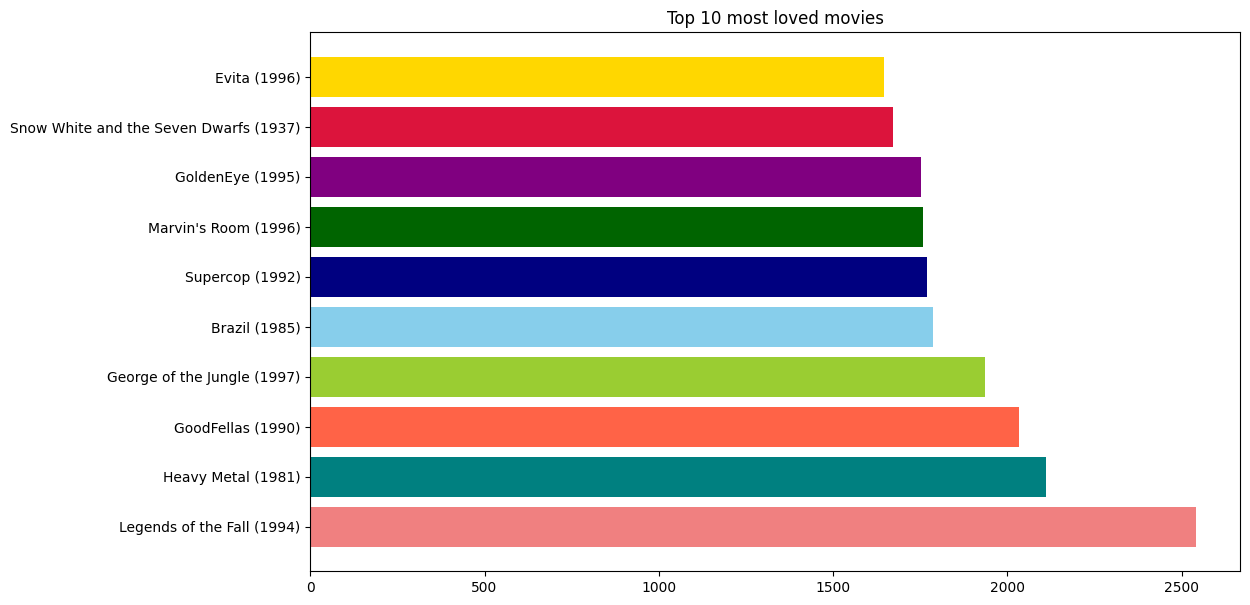

In [315]:
top_K_most_loved_movies = (
    rating_moveis.drop(labels=["timestamp", "release_date"], axis=1)
    .groupby("movie_id")
    .sum()
    .rating.sort_values(ascending=False)[:K]
)
tok_K_most_loved_movies_title = movies.iloc[top_K_most_loved_movies.index].movie_title

plt.figure(figsize=(12, 7))
plt.barh(tok_K_most_loved_movies_title, top_K_most_loved_movies, color=color_list[:K])
plt.title(f"Top {K} most loved movies")

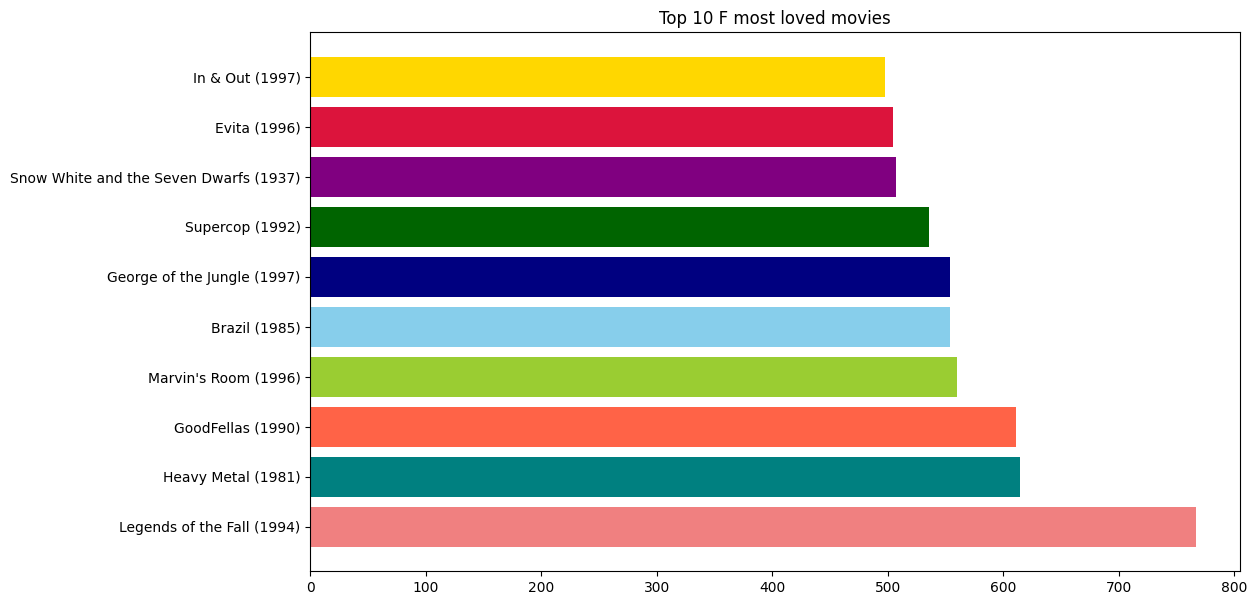

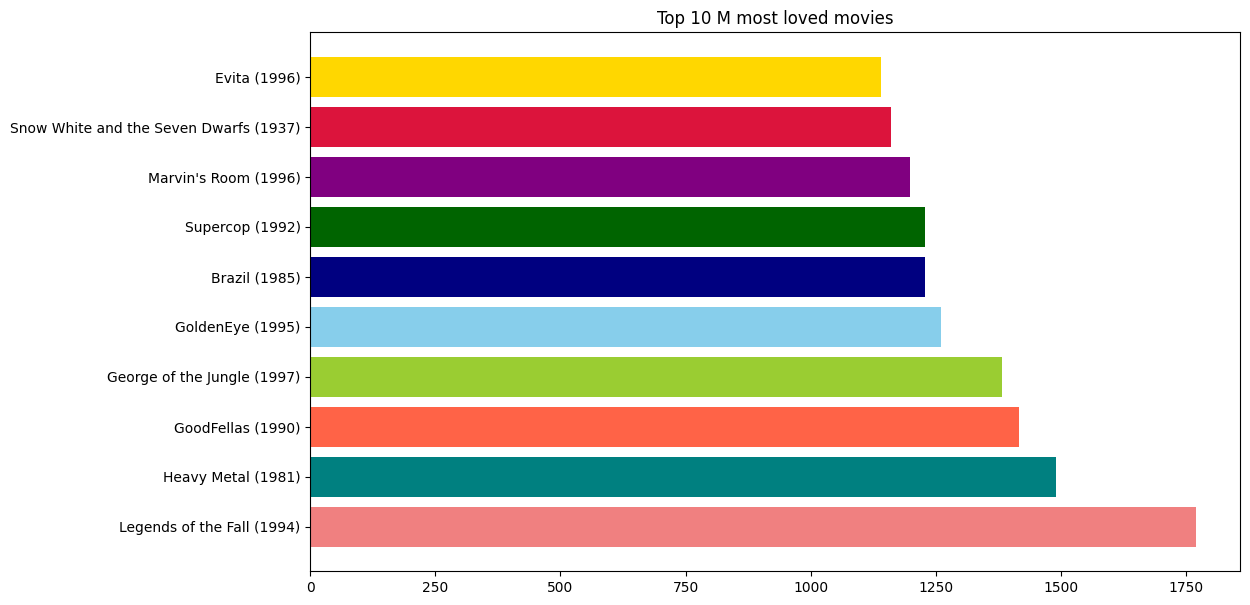

In [320]:
most_loved_movies_gender = (
    rating_user_movies.drop(labels=["timestamp", "release_date"], axis=1)
    .groupby(["gender", "movie_id"])
    .sum()
    .rating
)

for index_label in most_loved_movies_gender.index.get_level_values(0).unique():
    top_K_most_loved_movies_gender = most_loved_movies_gender[index_label].sort_values(
        ascending=False
    )[:K]
    tok_K_most_loved_movies_gender_title = movies.iloc[
        top_K_most_loved_movies_gender.index
    ].movie_title

    plt.figure(figsize=(12, 7))
    plt.barh(
        tok_K_most_loved_movies_gender_title,
        top_K_most_loved_movies_gender,
        color=color_list[:K],
    )
    plt.title(f"Top {K} {index_label} most loved movies")

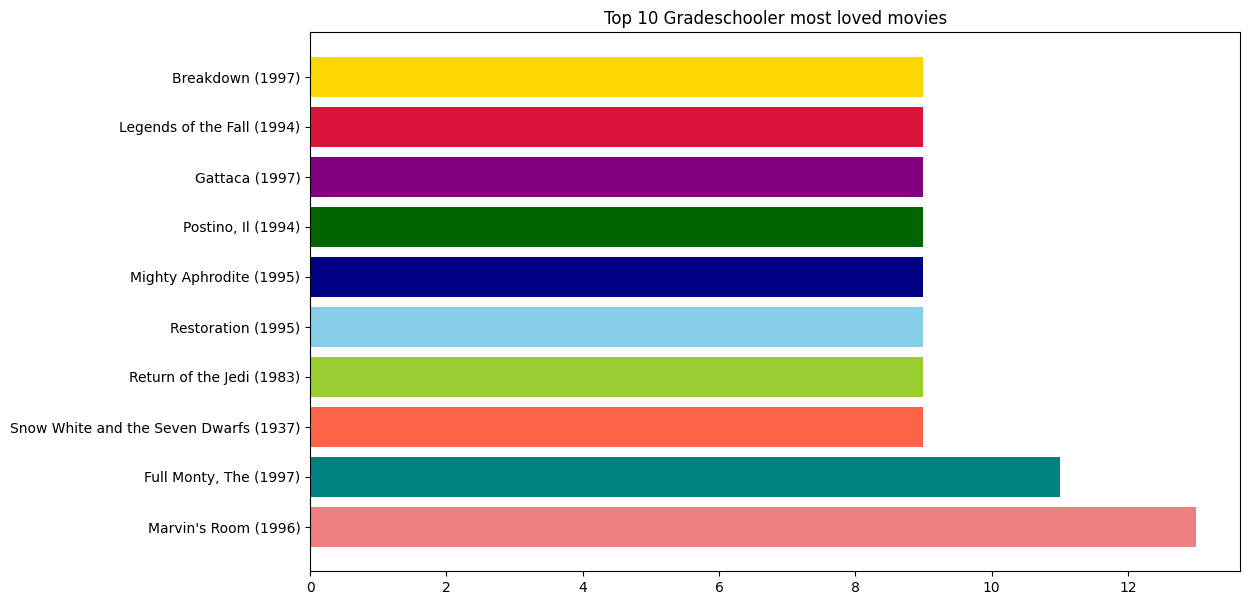

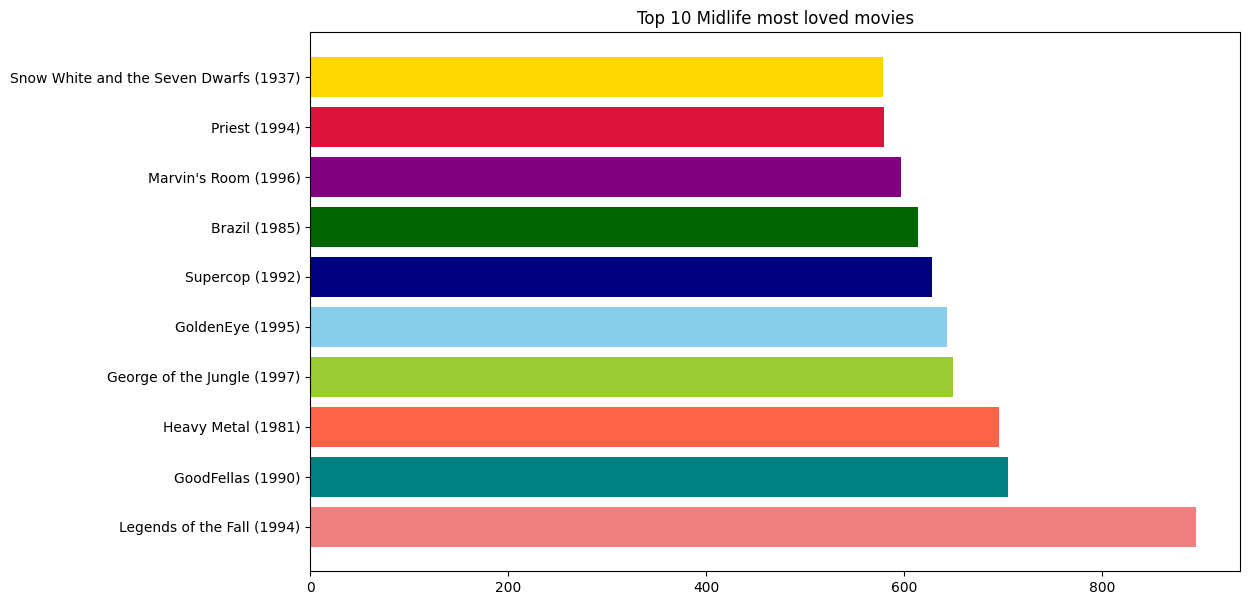

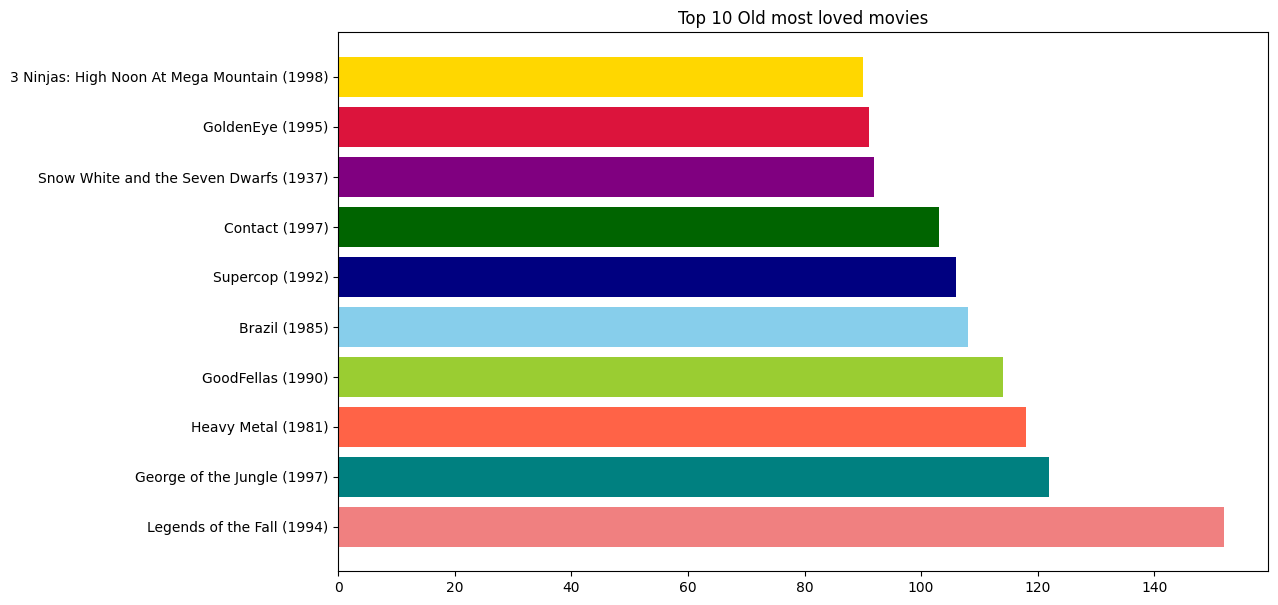

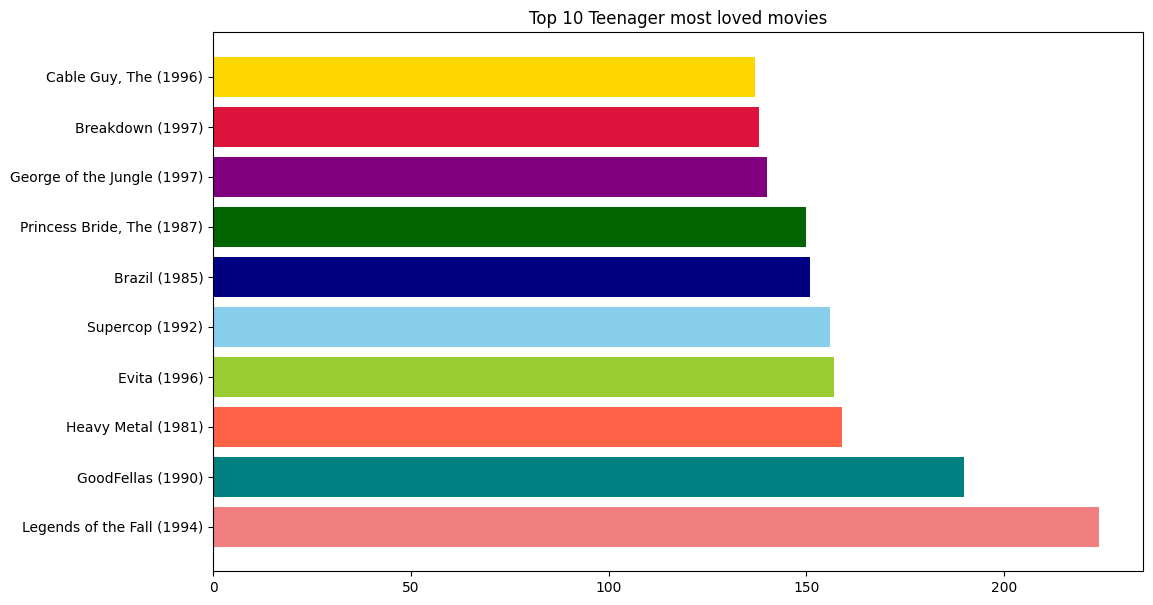

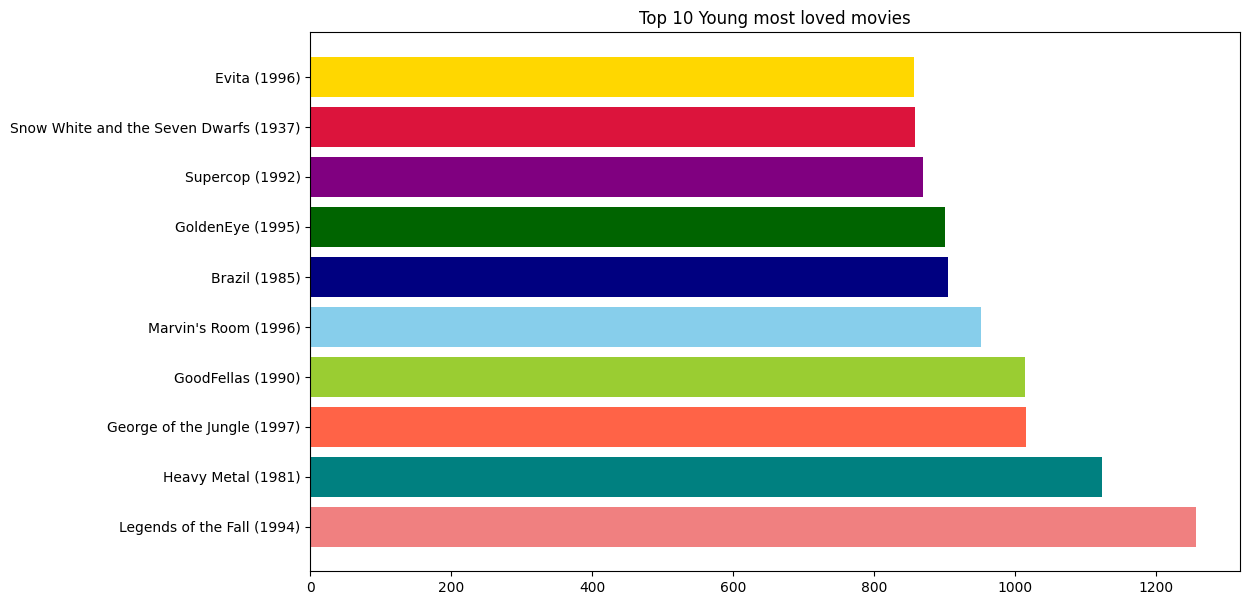

In [325]:
most_loved_movies_age = (
    rating_user_movies.drop(labels=["timestamp", "release_date"], axis=1)
    .groupby(["age_group", "movie_id"])
    .sum()
    .rating
)

for index_label in most_loved_movies_age.index.get_level_values(0).unique():
    top_K_most_loved_movie_age = most_loved_movies_age[index_label].sort_values(
        ascending=False
    )[:K]
    top_K_most_loved_movie_age_title = movies.iloc[
        top_K_most_loved_movie_age.index
    ].movie_title

    plt.figure(figsize=(12, 7))
    plt.barh(
        top_K_most_loved_movie_age_title,
        top_K_most_loved_movie_age,
        color=color_list[:K],
    )
    plt.title(f"Top {K} {index_label} most loved movies")

In [328]:
# Worst for rated movies

movies_ratings_sum = (
    rating_moveis.drop(labels=["timestamp", "release_date"], axis=1)
    .groupby("movie_id")
    .sum()
    .rating.sort_values()
)
movies_ratings_sum.index = movies.iloc[movies_ratings_sum.index].movie_title

In [330]:
lowest_rated_movies = movies_ratings_sum[movies_ratings_sum <= 10]

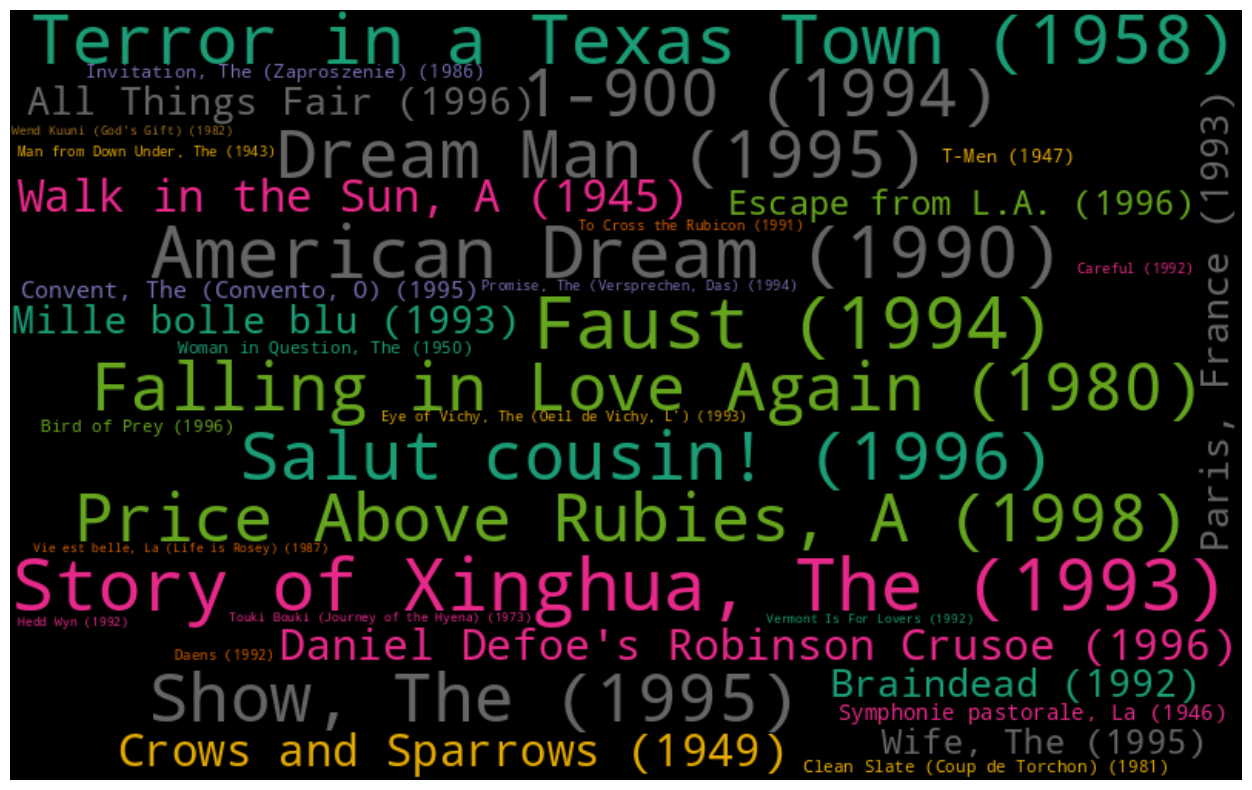

In [331]:
wordcloud = WordCloud(
    min_font_size=7,
    width=800,
    height=500,
    random_state=21,
    max_font_size=50,
    relative_scaling=0.5,
    colormap="Dark2",
)

wordcloud.generate_from_frequencies(frequencies=(11 - lowest_rated_movies).to_dict())
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()